# Visualization of Embeddings After Dimensionality Reduction

In [60]:
from DoTLMViz import CkptedTransformer
from transformers import GPT2Tokenizer

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import torch
import matplotlib.pyplot as plt

In [10]:
model = CkptedTransformer.from_pretrained(model_name="gpt2-small")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

c:\Users\NITRO5\miniconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [11]:
tokens = tokenizer("alpha beta gamma", return_tensors="pt")["input_ids"]

In [12]:
logits, ckpts = model.run_with_ckpts(tokens)

In [22]:
pca = PCA(n_components=2)
pca.fit(logits[:, :2, :].squeeze().cpu().detach().numpy())

PCA(n_components=2)

In [55]:
random_idxs = torch.randint(0, 50000, (1000,)).reshape(1, -1)

In [56]:
embed = model.embed(random_idxs).squeeze().detach().cpu()

In [57]:
embed.shape

torch.Size([1000, 768])

In [58]:
pca.fit(embed)

PCA(n_components=2)

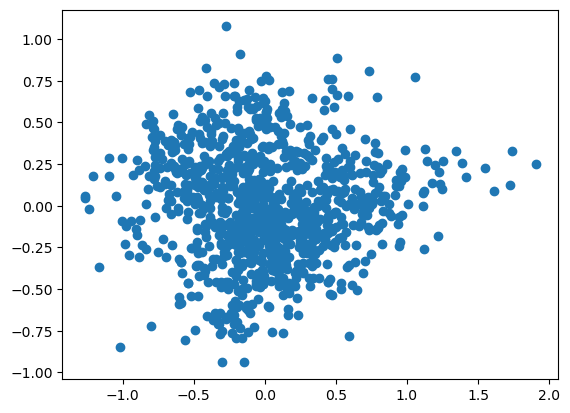

In [59]:
plt.scatter(pca.transform(embed)[:, 0], pca.transform(embed)[:, 1])

In [47]:
pca.transform(embed).reshape(2, -1)

array([[ 1.12653890e+00,  5.95997226e-03,  1.38645692e+00,
         1.32684375e-01, -2.21036314e-01, -3.83529547e-01,
        -3.03242384e-01, -3.03413402e-01, -3.65581159e-02,
         5.67725636e-01,  3.82698049e-01,  1.05086355e+00,
        -2.15272997e-01, -1.79501949e-01,  2.80327574e-01,
         8.36100944e-01,  6.56749595e-01, -4.72869225e-01,
        -1.61766055e-01, -3.18033787e-01, -4.07567075e-01,
        -3.50388383e-01,  3.09370949e-01,  5.67472370e-01,
        -4.47225279e-01,  3.93265577e-02,  1.00106586e-01,
        -4.75256150e-01,  6.16924719e-02, -1.15119968e-01,
         1.08559598e-01, -1.07017582e-01,  6.01680034e-01,
        -4.26587310e-02,  3.33321834e-01, -1.53288480e-01,
        -1.08189474e-01, -1.95081848e-01, -1.44237203e-01,
         4.22898749e-02,  8.20288835e-02,  5.79990222e-01,
        -6.95767510e-01,  1.99156414e-03, -3.77974068e-01,
        -2.84818860e-01, -2.53737253e-01,  6.13730754e-01,
         3.59752420e-01, -1.46956680e-01, -1.08605900e-0

## t-SNE

In [63]:
tsne = TSNE(n_components=2)

In [67]:
result = tsne.fit_transform(embed)

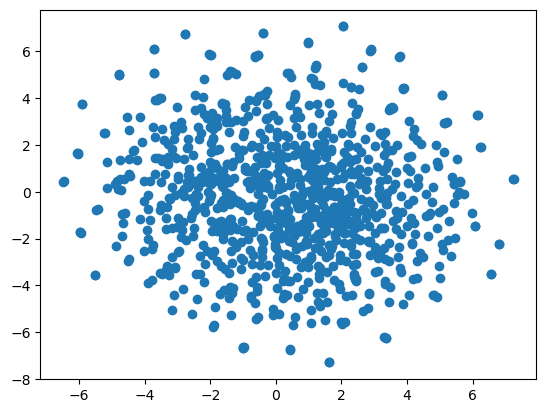

In [68]:
plt.scatter(result[:, 0], result[:, 1])